In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/anand/OneDrive/Desktop/netflix_titles.csv')

# Check if data loaded correctly
print(df.head())

    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [11]:
# 1. Handling Missing Values
# For categorical columns, we can fill missing values with "Unknown"
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Drop rows where 'date_added' or 'rating' is missing (usually very few rows)
df.dropna(subset=['date_added', 'rating'], inplace=True)

# 2. Fix Data Types
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# 3. Feature Engineering
# Extract Year and Month from 'date_added' for trend analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Check the result
print(df.isnull().sum()) # Should be clean now

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


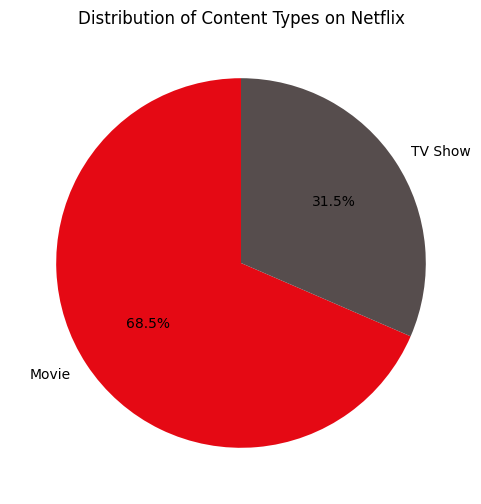

In [12]:
# Ratio of Movies vs TV Shows
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#E50914', '#564d4d'])
plt.title('Distribution of Content Types on Netflix')
plt.show()

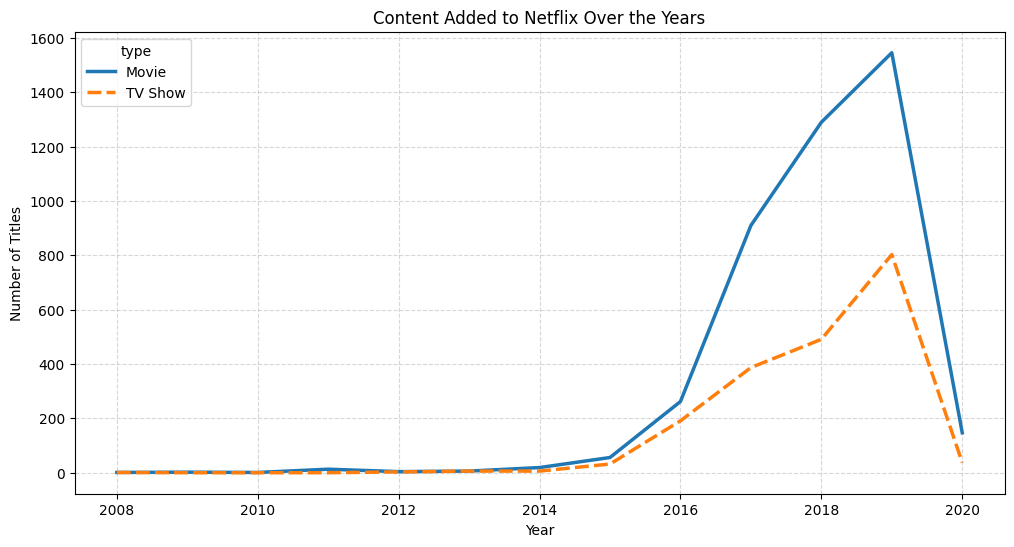

In [13]:
# Group by year and type
content_growth = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=content_growth, linewidth=2.5)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\anand\AppData\Local\Temp\ipykernel_11312\2969029013.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Genre', x='Count', data=genres_df, palette='Reds_r')


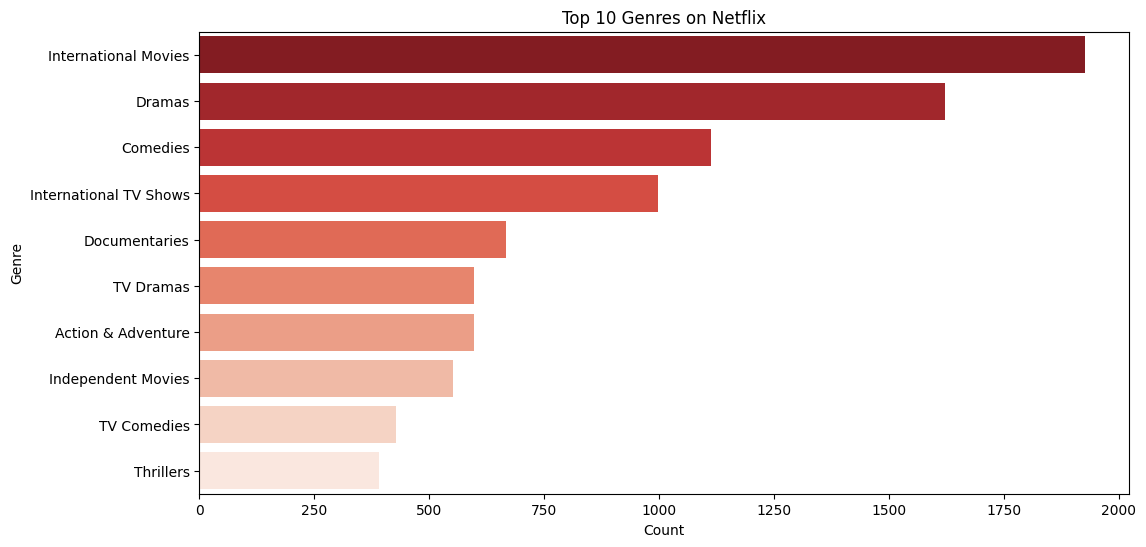

In [14]:
from collections import Counter

# Split genres and flatten the list
genres_list = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(genres_list).most_common(10)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(y='Genre', x='Count', data=genres_df, palette='Reds_r')
plt.title('Top 10 Genres on Netflix')
plt.show()

C:\Users\anand\AppData\Local\Temp\ipykernel_11312\2768428208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='Reds_r')


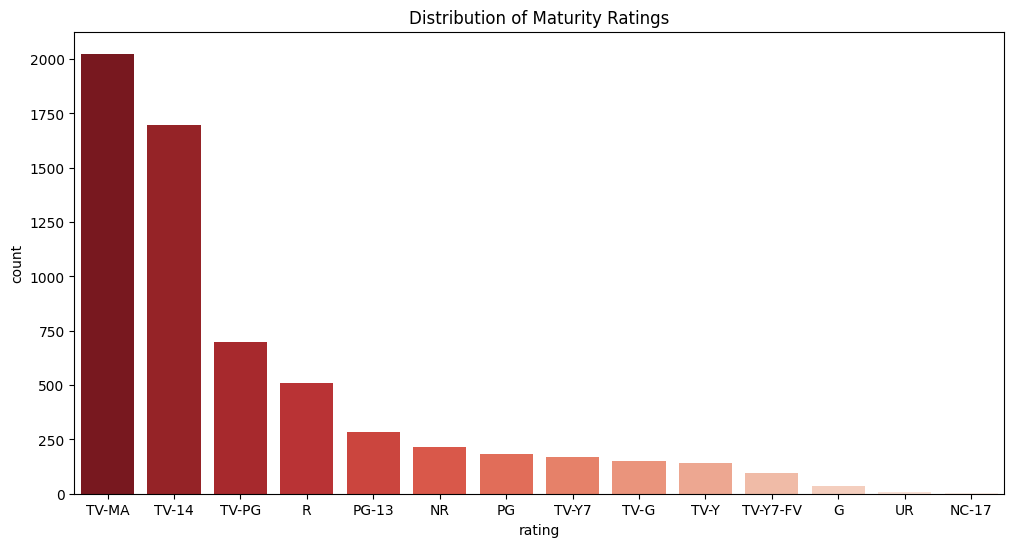

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='Reds_r')
plt.title('Distribution of Maturity Ratings')
plt.show()

C:\Users\anand\AppData\Local\Temp\ipykernel_11312\884640516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')


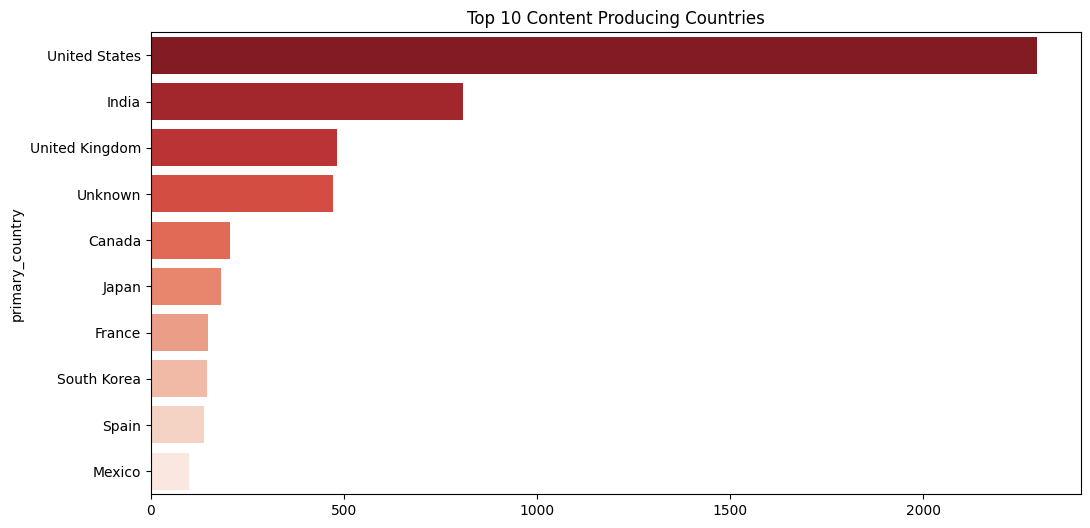

In [16]:
# Similar to genres, countries can be comma-separated. We'll take the primary country (first one).
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])

top_countries = df['primary_country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
plt.title('Top 10 Content Producing Countries')
plt.show()

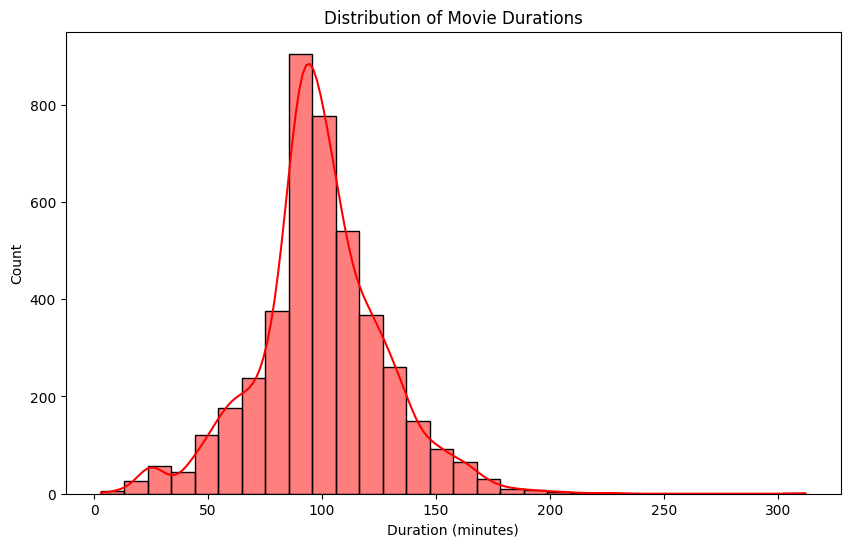

In [17]:
# Filter for Movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Clean duration column (remove " min" and convert to integer)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Plot kde distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()